FASTA format function from problem description:

In [1]:
def read_fasta_file(filename):
    """
    Reads the given FASTA file f and returns a dictionary of sequences.

    Lines starting with ';' in the FASTA file are ignored.
    """
    sequences_lines = {}
    current_sequence_lines = None
    with open(filename) as fp:
        for line in fp:
            line = line.strip()
            if line.startswith(';') or not line:
                continue
            if line.startswith('>'):
                sequence_name = line.lstrip('>')
                current_sequence_lines = []
                sequences_lines[sequence_name] = current_sequence_lines
            else:
                if current_sequence_lines is not None:
                    current_sequence_lines.append(line)
    sequences = {}
    for name, lines in sequences_lines.items():
        sequences[name] = ''.join(lines)
    return sequences

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

genome = ''
annotation = ''
for i in range(1,6):
    genome += read_fasta_file('data/genome%d.fa' % i)['genome%d' % i]
    annotation += read_fasta_file('data/annotation%d.fa' % i)['annotation%d' % i]

print(len(genome), len(annotation))

11045066 11045066


C fra R
R fra C
R fra C
R fra C


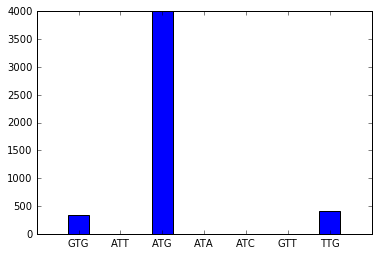

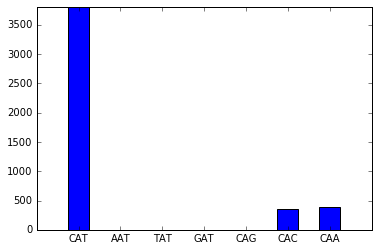

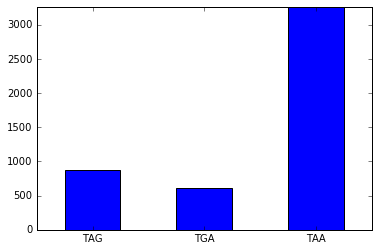

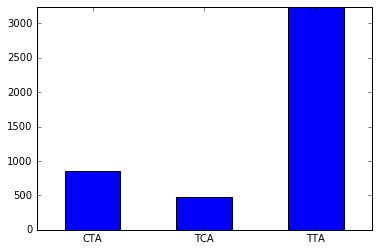

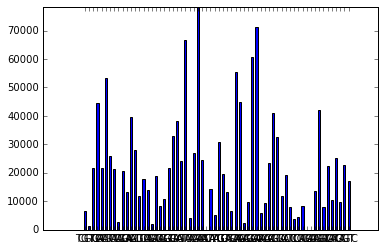

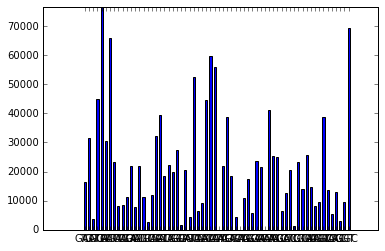

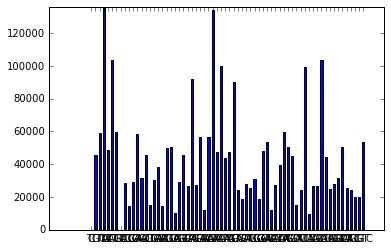

In [5]:
def addCodon(codon, start, stop, content):
    if len(codon) >= 1:
        start[codon[0]] += 1
        for c in codon[1:-1]:
            content[c] += 1
        stop[codon[-1]] += 1


def hist_from_dict(d):
    plt.figure()
    X = np.arange(len(d))
    plt.bar(X, d.values(), align='center', width=0.5)
    plt.xticks(X, d.keys())
    ymax = max(d.values()) + 1
    plt.ylim(0, ymax)
    plt.show()

C_start = defaultdict(lambda: 0)
C_stop = defaultdict(lambda: 0)
C_content = defaultdict(lambda: 0)

R_start = defaultdict(lambda: 0)
R_stop = defaultdict(lambda: 0)
R_content = defaultdict(lambda: 0)

N_content = defaultdict(lambda: 0)

state = 'N'
i = 0
gene = list()
while i < len(annotation):
    if annotation[i] == 'C':
        if state == 'R':
            print('C fra R')
            addCodon(gene, R_start, R_stop, R_content)
            gene = list()
        state = 'C'
        gene.append(genome[i:i+3])
        i += 3
    elif annotation[i] == 'R':
        if state == 'C':
            print('R fra C')
            addCodon(gene, C_start, C_stop, C_content)
            gene = list()
        state = 'R'
        gene.append(genome[i:i+3])
        i += 3
    else:
        if state != 'N':
            if state == 'C':
                addCodon(gene, C_start, C_stop, C_content)
            elif state == 'R':
                addCodon(gene, R_start, R_stop, R_content)
            gene = list()
            state = 'N'
        N_content[genome[i:i+3]] += 1
        i = i+1

        
hist_from_dict(C_start)
hist_from_dict(R_stop)

hist_from_dict(C_stop)
hist_from_dict(R_start)

hist_from_dict(C_content)
hist_from_dict(R_content)
hist_from_dict(N_content)

    

In [56]:
print(C_start['ATG'])
print(C_content['ATG'])
print(N_content['ATG'])

print(C_content['TAA'])
print(C_content['TAG'])
print(C_content['TGA'])


4010
30719
47317
23
9
3


In [ ]:
Hypoteser:
    Længden af sekvenser med C eller R er altid et multiplum af 3
    